# Scraping twitter data of covid-19


In [18]:


import string

from collections import Counter

import matplotlib.pyplot as plt

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize

import nltk
#nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings('ignore')

In [19]:
def get_tweets():
    import GetOldTweets3 as got   # library used to scrape data from twitter without any other tools
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('COVID19Tracking') \
        .setSince("2020-03-01") \
        .setUntil("2020-04-30") \
        .setMaxTweets(100)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    # Creating list of chosen tweet data
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [20]:
# reading text file
text = ""
text_tweets = get_tweets()

length = len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text

# converting to lowercase
lower_case = text.lower()


# str.maketrans removes any punctuations 

cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# Using word_tokenize to tokenize sentence into words

tokenized_words = word_tokenize(cleaned_text, "english")



In [21]:
# Print texts
text_tweets

[['If you come out of THIS pandemic still believing that quantitative data are inherently more "objective" or "trustworthy" than qual data?? There is truly nothing more I can do for you. Thank you to my friends @COVID19Tracking for wrangling these misbehaving numbers so patiently. '],
 ['The #GalaxyNote20 series comes in a stunning array of mystic hues that redefine work and play. Which colour do you have your eyes set on, are you on Team #MysticBronze or Team #MysticGreen? Pre-book now: https://bit.ly/3h07X4z #Samsung'],
 ['The total number of confirmed #COVID19 cases in #Nebraska has DOUBLED every 7-10 days for the past 3 weeks according to @COVID19Tracking #coronavirus #StayHome'],
 ['The liar and chief said we’d hit that benchmark “very soon.” We’re a global disgrace'],
 ['I mean the fact that blue states tend to have the transportation hubs because you know people actually want to visit them instead of nothing to offer ass red states have nothing to do with it...also the fact red 

# sentiment analysis 

In [22]:
# Removing Stop Words
final_words = []

for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [23]:

lemma_words = []

for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

In [26]:
emotion_list = []

with open('C:/Users/Vikash/Desktop/Stock_Sentiment/sentiment_analysis_all_files/emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)
            
print("People emotions from the text \n", emotion_list, '\n \n')


w = Counter(emotion_list)
print("Count of each emotion \n", w)

People emotions from the text 
 [' sad', ' average', ' happy', ' sad', ' average', ' happy', ' sad'] 
 

Count of each emotion 
 Counter({' sad': 3, ' average': 2, ' happy': 2})


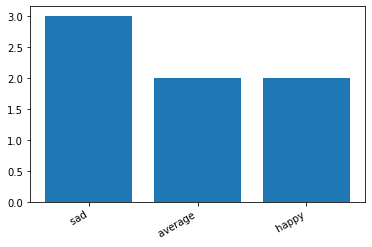

In [27]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()